   leg_angle [deg]  velocity [m/s]
0              0.0        0.578119
1              0.0        0.578447
2              0.0        0.578477
3              0.0        0.578447
4              0.0        0.578477


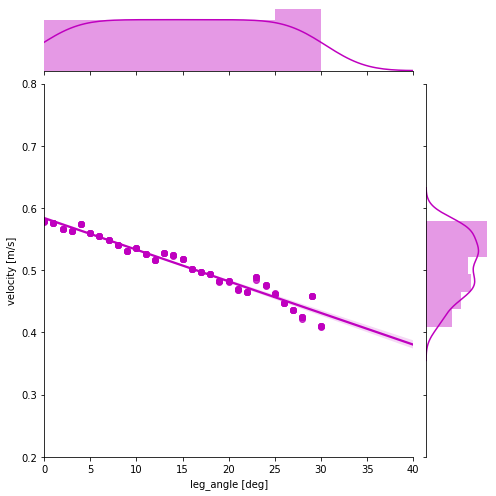

In [5]:
import seaborn as sns
import pandas as pd
#sns.set_theme(style="ticks")

CSV_FILE_PATH = './vel_alternate_gait.csv'
df = pd.read_csv(CSV_FILE_PATH)
print(df.head())

g = sns.jointplot(x="leg_angle [deg]", y="velocity [m/s]", data=df,
                  kind="reg", truncate=False,
                  xlim=(0, 40), ylim=(0.2, 0.8),
                  color="m", height=7)
# sns.relplot(data=df, x="leg_angle [deg]", y="velocity [m/s]", kind="line")